In [1]:
import tensorflow as tf
import numpy as np
 
from train_model import train_model
from data_processing import segment_spectrum, segment_spectrum_batch
from RamanNet_model import RamanNet
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-12-07 13:34:15.612317: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 13:34:16.447126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 22306 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2022-12-07 13:34:16.447680: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:1 with 22221 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7372142467021826320
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 23390388224
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15927410165272681803
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6"
 xla_global_id: 416903419,
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 23300407296
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16743193505052726550
 physical_device_desc: "device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6"
 xla_global_id: 2144165316]

In [2]:
# prepare data
compound = 0
data_path = '/home/jeonggyu/workspace/data' 
#X_datafile = data_path+'/DeepCID/augmented_data/covid_backup/raw/'+str(compound)+'component.npy' 
#y_datafile = data_path+'/DeepCID/augmented_data/covid_backup/raw/'+str(compound)+'label.npy' 
#X_datafile = data_path+'/DeepCID/augmented_data/covid/'+str(compound)+'component.npy' 
#y_datafile = data_path+'/DeepCID/augmented_data/covid/'+str(compound)+'label.npy' 
#X_datafile = data_path+'/DeepCID/augmented_data/ramcell/'+str(compound)+'component.npy' 
#y_datafile = data_path+'/DeepCID/augmented_data/ramcell/'+str(compound)+'label.npy' 
X_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa/'+str(compound)+'component.npy' 
y_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa/'+str(compound)+'label.npy' 
#X_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa_mix6_mix8/'+str(compound)+'component.npy' 
#y_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa_mix6_mix8/'+str(compound)+'label.npy' 
#wavenum_datafile = data_path+'/CoV/processed/wavenum.npy' 
wavenum_datafile = data_path+'/ramcell/processed/wavenum.npy' 

#labels=['Pos','Neg','Blank']
#labels=['e. coli', 's. aureus', 'noise', 'mix (10^8)']
labels=['e. coli', 's. aureus']

X = np.load(X_datafile)
y = np.load(y_datafile)
wavenum = np.load(wavenum_datafile)
y = y.reshape(y.shape[0]).astype(np.int)
num = np.unique(y, axis=0)
num = num.shape[0]
y = np.eye(num)[y]

r = int(y.shape[0]*0.1+0.5)

X_train = X[0:r*6]
X_val = X[r*6:r*8]
X_test = X[r*8:]
y_train = y[0:r*6]
y_val = y[r*6:r*8]
y_test = y[r*8:]

print(X.shape, y.shape, wavenum.shape)
print(wavenum)

print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)


(1076, 1015) (1076, 2) (1015,)
[1714.646484 1713.666992 1712.688477 ...  607.584961  606.358398
  605.130859]
(648, 1015) (216, 1015) (212, 1015) (648, 2) (216, 2) (212, 2)


/home/jeonggyu/venv_dir/py37/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/GPU:0"])

w_len = 50
dw = 25
mdl, training_history = train_model(X_train, y_train, X_val, y_val,w_len,dw,200,'/home/jeonggyu/workspace/data/RamanNet',mirrored_strategy)

2022-12-07 13:36:29.187655: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22306 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2022-12-07 13:36:29.188047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22221 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
X shape :  (39, 648, 50) (39, 216, 50) 50 648
Y shape :  (648,) (648, 2) (216,) (216,)
50 648 2
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localh

2022-12-07 13:36:30.446390: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_4508"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\020FlatMapDataset:4"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUCT

2/2 [==============================] - ETA: 0s - loss: 1.0118 - embedding_loss: 0.9981 - classification_loss: 1.0256 

2022-12-07 13:36:41.923181: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-07 13:36:42.245138: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_22946"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\021FlatMapDataset:70"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_ty


Epoch 1: val_loss improved from inf to 0.82020, saving model to /home/jeonggyu/workspace/data/RamanNet


2022-12-07 13:36:48.737734: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/jeonggyu/workspace/data/RamanNet/assets
2/2 [==============================] - 26s 15s/step - loss: 1.0118 - embedding_loss: 0.9981 - classification_loss: 1.0256 - val_loss: 0.8202 - val_embedding_loss: 0.9962 - val_classification_loss: 0.6442 - lr: 0.0010
Epoch 2/200
2/2 [==============================] - ETA: 0s - loss: 0.7743 - embedding_loss: 0.9975 - classification_loss: 0.5510
Epoch 2: val_loss improved from 0.82020 to 0.80453, saving model to /home/jeonggyu/workspace/data/RamanNet
INFO:tensorflow:Assets written to: /home/jeonggyu/workspace/data/RamanNet/assets
2/2 [==============================] - 13s 12s/step - loss: 0.7743 - embedding_loss: 0.9975 - classification_loss: 0.5510 - val_loss: 0.8045 - val_embedding_loss: 0.9942 - val_classification_loss: 0.6148 - lr: 0.0010
Epoch 3/200
2/2 [==============================] - ETA: 0s - loss: 0.6604 - embedding_loss: 0.9958 - classification_loss: 0.3249
Epoch 3: val_loss improved from 0.80453

Epoch 18/200
2/2 [==============================] - ETA: 0s - loss: 0.2227 - embedding_loss: 0.4285 - classification_loss: 0.0168
Epoch 18: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 258ms/step - loss: 0.2227 - embedding_loss: 0.4285 - classification_loss: 0.0168 - val_loss: 0.7214 - val_embedding_loss: 0.8540 - val_classification_loss: 0.5889 - lr: 0.0010
Epoch 19/200
2/2 [==============================] - ETA: 0s - loss: 0.2644 - embedding_loss: 0.4927 - classification_loss: 0.0362
Epoch 19: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 262ms/step - loss: 0.2644 - embedding_loss: 0.4927 - classification_loss: 0.0362 - val_loss: 0.6874 - val_embedding_loss: 0.8366 - val_classification_loss: 0.5382 - lr: 0.0010
Epoch 20/200
2/2 [==============================] - ETA: 0s - loss: 0.1488 - embedding_loss: 0.2847 - classification_loss: 0.0129
Epoch 20: val_loss did not improve from 0.53712
2/2 [=========================

2/2 [==============================] - ETA: 0s - loss: 0.0313 - embedding_loss: 0.0548 - classification_loss: 0.0078
Epoch 38: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 243ms/step - loss: 0.0313 - embedding_loss: 0.0548 - classification_loss: 0.0078 - val_loss: 1.2621 - val_embedding_loss: 0.9676 - val_classification_loss: 1.5566 - lr: 8.1000e-04
Epoch 39/200
2/2 [==============================] - ETA: 0s - loss: 0.0226 - embedding_loss: 0.0387 - classification_loss: 0.0065
Epoch 39: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 256ms/step - loss: 0.0226 - embedding_loss: 0.0387 - classification_loss: 0.0065 - val_loss: 1.2769 - val_embedding_loss: 0.9676 - val_classification_loss: 1.5863 - lr: 8.1000e-04
Epoch 40/200
2/2 [==============================] - ETA: 0s - loss: 0.0200 - embedding_loss: 0.0366 - classification_loss: 0.0035
Epoch 40: val_loss did not improve from 0.53712
2/2 [==============================

2/2 [==============================] - ETA: 0s - loss: 0.0171 - embedding_loss: 0.0299 - classification_loss: 0.0043
Epoch 58: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 250ms/step - loss: 0.0171 - embedding_loss: 0.0299 - classification_loss: 0.0043 - val_loss: 0.8060 - val_embedding_loss: 0.8835 - val_classification_loss: 0.7284 - lr: 6.5610e-04
Epoch 59/200
2/2 [==============================] - ETA: 0s - loss: 0.0153 - embedding_loss: 0.0277 - classification_loss: 0.0029
Epoch 59: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 259ms/step - loss: 0.0153 - embedding_loss: 0.0277 - classification_loss: 0.0029 - val_loss: 0.7710 - val_embedding_loss: 0.8686 - val_classification_loss: 0.6734 - lr: 6.5610e-04
Epoch 60/200
2/2 [==============================] - ETA: 0s - loss: 0.0411 - embedding_loss: 0.0720 - classification_loss: 0.0103
Epoch 60: val_loss did not improve from 0.53712
2/2 [==============================

2/2 [==============================] - ETA: 0s - loss: 0.0210 - embedding_loss: 0.0382 - classification_loss: 0.0037
Epoch 78: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 250ms/step - loss: 0.0210 - embedding_loss: 0.0382 - classification_loss: 0.0037 - val_loss: 0.9080 - val_embedding_loss: 0.9165 - val_classification_loss: 0.8995 - lr: 5.3144e-04
Epoch 79/200
2/2 [==============================] - ETA: 0s - loss: 0.0095 - embedding_loss: 0.0130 - classification_loss: 0.0061
Epoch 79: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 262ms/step - loss: 0.0095 - embedding_loss: 0.0130 - classification_loss: 0.0061 - val_loss: 0.8907 - val_embedding_loss: 0.9118 - val_classification_loss: 0.8696 - lr: 5.3144e-04
Epoch 80/200
2/2 [==============================] - ETA: 0s - loss: 0.0138 - embedding_loss: 0.0231 - classification_loss: 0.0045
Epoch 80: val_loss did not improve from 0.53712
2/2 [==============================

2/2 [==============================] - ETA: 0s - loss: 0.0838 - embedding_loss: 0.1620 - classification_loss: 0.0055
Epoch 98: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 233ms/step - loss: 0.0838 - embedding_loss: 0.1620 - classification_loss: 0.0055 - val_loss: 0.6492 - val_embedding_loss: 0.7990 - val_classification_loss: 0.4993 - lr: 4.3047e-04
Epoch 99/200
2/2 [==============================] - ETA: 0s - loss: 0.0108 - embedding_loss: 0.0195 - classification_loss: 0.0020
Epoch 99: val_loss did not improve from 0.53712
2/2 [==============================] - 1s 945ms/step - loss: 0.0108 - embedding_loss: 0.0195 - classification_loss: 0.0020 - val_loss: 0.6729 - val_embedding_loss: 0.8149 - val_classification_loss: 0.5309 - lr: 4.3047e-04
Epoch 100/200
2/2 [==============================] - ETA: 0s - loss: 0.0068 - embedding_loss: 0.0118 - classification_loss: 0.0017    
Epoch 100: val_loss did not improve from 0.53712
2/2 [========================

2/2 [==============================] - ETA: 0s - loss: 4.8035e-04 - embedding_loss: 1.9010e-04 - classification_loss: 7.7060e-04
Epoch 118: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 221ms/step - loss: 4.8035e-04 - embedding_loss: 1.9010e-04 - classification_loss: 7.7060e-04 - val_loss: 0.5612 - val_embedding_loss: 0.7436 - val_classification_loss: 0.3787 - lr: 3.4868e-04
Epoch 119/200
2/2 [==============================] - ETA: 0s - loss: 0.0048 - embedding_loss: 0.0080 - classification_loss: 0.0016
Epoch 119: val_loss did not improve from 0.53712
2/2 [==============================] - 0s 222ms/step - loss: 0.0048 - embedding_loss: 0.0080 - classification_loss: 0.0016 - val_loss: 0.5597 - val_embedding_loss: 0.7428 - val_classification_loss: 0.3766 - lr: 3.4868e-04
Epoch 120/200
2/2 [==============================] - ETA: 0s - loss: 8.6318e-04 - embedding_loss: 6.2646e-04 - classification_loss: 0.0011    
Epoch 120: val_loss did not improve from 0.

2/2 [==============================] - 13s 13s/step - loss: 0.0010 - embedding_loss: 0.0013 - classification_loss: 7.1085e-04 - val_loss: 0.5018 - val_embedding_loss: 0.6934 - val_classification_loss: 0.3103 - lr: 3.4868e-04
Epoch 136/200
2/2 [==============================] - ETA: 0s - loss: 0.0065 - embedding_loss: 0.0102 - classification_loss: 0.0028
Epoch 136: val_loss improved from 0.50182 to 0.49337, saving model to /home/jeonggyu/workspace/data/RamanNet
INFO:tensorflow:Assets written to: /home/jeonggyu/workspace/data/RamanNet/assets
2/2 [==============================] - 13s 13s/step - loss: 0.0065 - embedding_loss: 0.0102 - classification_loss: 0.0028 - val_loss: 0.4934 - val_embedding_loss: 0.6862 - val_classification_loss: 0.3006 - lr: 3.4868e-04
Epoch 137/200
2/2 [==============================] - ETA: 0s - loss: 0.0059 - embedding_loss: 0.0102 - classification_loss: 0.0015
Epoch 137: val_loss improved from 0.49337 to 0.48056, saving model to /home/jeonggyu/workspace/data/Ra

Epoch 152/200
2/2 [==============================] - ETA: 0s - loss: 0.0034 - embedding_loss: 0.0048 - classification_loss: 0.0020
Epoch 152: val_loss did not improve from 0.40705
2/2 [==============================] - 0s 234ms/step - loss: 0.0034 - embedding_loss: 0.0048 - classification_loss: 0.0020 - val_loss: 0.4575 - val_embedding_loss: 0.6666 - val_classification_loss: 0.2483 - lr: 3.4868e-04
Epoch 153/200
2/2 [==============================] - ETA: 0s - loss: 0.0015 - embedding_loss: 0.0020 - classification_loss: 0.0010            
Epoch 153: val_loss did not improve from 0.40705
2/2 [==============================] - 0s 240ms/step - loss: 0.0015 - embedding_loss: 0.0020 - classification_loss: 0.0010 - val_loss: 0.4599 - val_embedding_loss: 0.6691 - val_classification_loss: 0.2506 - lr: 3.4868e-04
Epoch 154/200
2/2 [==============================] - ETA: 0s - loss: 0.0030 - embedding_loss: 0.0044 - classification_loss: 0.0015
Epoch 154: val_loss did not improve from 0.40705
2/2 

Epoch 170/200
2/2 [==============================] - ETA: 0s - loss: 0.0010 - embedding_loss: 5.7027e-04 - classification_loss: 0.0015        
Epoch 170: val_loss did not improve from 0.36438
2/2 [==============================] - 0s 248ms/step - loss: 0.0010 - embedding_loss: 5.7027e-04 - classification_loss: 0.0015 - val_loss: 0.3755 - val_embedding_loss: 0.5881 - val_classification_loss: 0.1628 - lr: 3.1381e-04
Epoch 171/200
2/2 [==============================] - ETA: 0s - loss: 0.0052 - embedding_loss: 0.0089 - classification_loss: 0.0016
Epoch 171: val_loss did not improve from 0.36438
2/2 [==============================] - 0s 234ms/step - loss: 0.0052 - embedding_loss: 0.0089 - classification_loss: 0.0016 - val_loss: 0.3651 - val_embedding_loss: 0.5765 - val_classification_loss: 0.1536 - lr: 3.1381e-04
Epoch 172/200
2/2 [==============================] - ETA: 0s - loss: 0.0041 - embedding_loss: 0.0070 - classification_loss: 0.0012
Epoch 172: val_loss improved from 0.36438 to 0.35

In [ ]:

X_train_seg = segment_spectrum_batch(X_train, w_len, dw)
X_val_seg  = segment_spectrum_batch(X_val, w_len, dw)
X_test_seg  = segment_spectrum_batch(X_test, w_len, dw)
print(len(X_train_seg),len(y_train))
print(X_train_seg[0].shape)

y_test_argmax = np.argmax(y_test,axis=1)
y_train_argmax = np.argmax(y_train,axis=1)
y_val_argmax = np.argmax(y_val,axis=1)

In [ ]:
mdl(X_train_seg)[1].shape

In [ ]:
def accuracy(mdl,X,y,w_len,dw):
    X = segment_spectrum_batch(X, w_len, dw)
    predict = np.argmax(mdl(X)[1],axis=1)
    y = np.argmax(y,axis=1)
    unique, counts = np.unique(y - predict, return_counts = True)
    print('predict : ', predict)
    print('y : ', y)
    uniq_cnt_dict = dict(zip(unique, counts))
    print("accuracy = {}%\n{}".format(uniq_cnt_dict[0]/len(y)*100,uniq_cnt_dict))
    return uniq_cnt_dict, predict, y

In [ ]:
result_train,predict_train, y_train = accuracy(mdl,X_train,y_train,w_len,dw)
result_val, predict_val, y_val = accuracy(mdl,X_val,y_val,w_len,dw)
result_test, predict_test, y_test = accuracy(mdl,X_test,y_test,w_len,dw)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_test,predict_test)

cm = confusion_matrix(y_test, predict_test)
f = sns.heatmap(cm, annot=True,cmap='Blues', fmt='g',xticklabels=labels,yticklabels=labels)

In [ ]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(3,1,figsize=(20,30))
for i in range(50):
    axs[y_test[i]].plot(wavenum,X_test[i])
    #axs[y_test[i]].set_ylim([-0.02,1.1])
plt.show()

In [9]:
# prepare data
data_path = '/home/jeonggyu/workspace/data' 

X_test_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1207_ecoli/0component.npy' 
y_test_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1207_ecoli/0label.npy' 

wavenum_datafile = data_path+'/ramcell/wavenum.npy' 
X_ = np.load(X_test_datafile)
y_ = np.load(y_test_datafile)
wavenum = np.load(wavenum_datafile)
y_ = y_.reshape(y_.shape[0]).astype(np.int)
num = np.unique(y_, axis=0)
num = num.shape[0]
y_ = np.eye(num)[y_]

print(X_.shape, y_.shape, wavenum.shape)
print(wavenum)

print(X_.shape,y_.shape)

(2544, 1015) (2544, 4) (1015,)
[1669.533203 1668.545898 1667.557617 ...  551.817383  550.578125
  549.337891]
(2544, 1015) (2544, 4)


/home/jeonggyu/venv_dir/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


In [10]:
result_test, predict_test, y_ = accuracy(mdl,X_,y_,w_len,dw)

accuracy = 0.9571540880503144%
{-1: 64, 0: 2435, 1: 4, 2: 41}


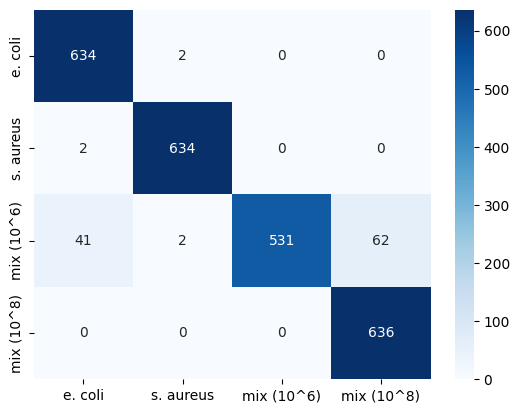

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_,predict_test)
labels=['e. coli', 's. aureus', 'mix (10^6)', 'mix (10^8)']
cm = confusion_matrix(y_, predict_test)
f = sns.heatmap(cm, annot=True,cmap='Blues', fmt='g',xticklabels=labels,yticklabels=labels)

In [12]:
y_[0:20]

array([1, 1, 2, 3, 2, 3, 0, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 0, 0, 1])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


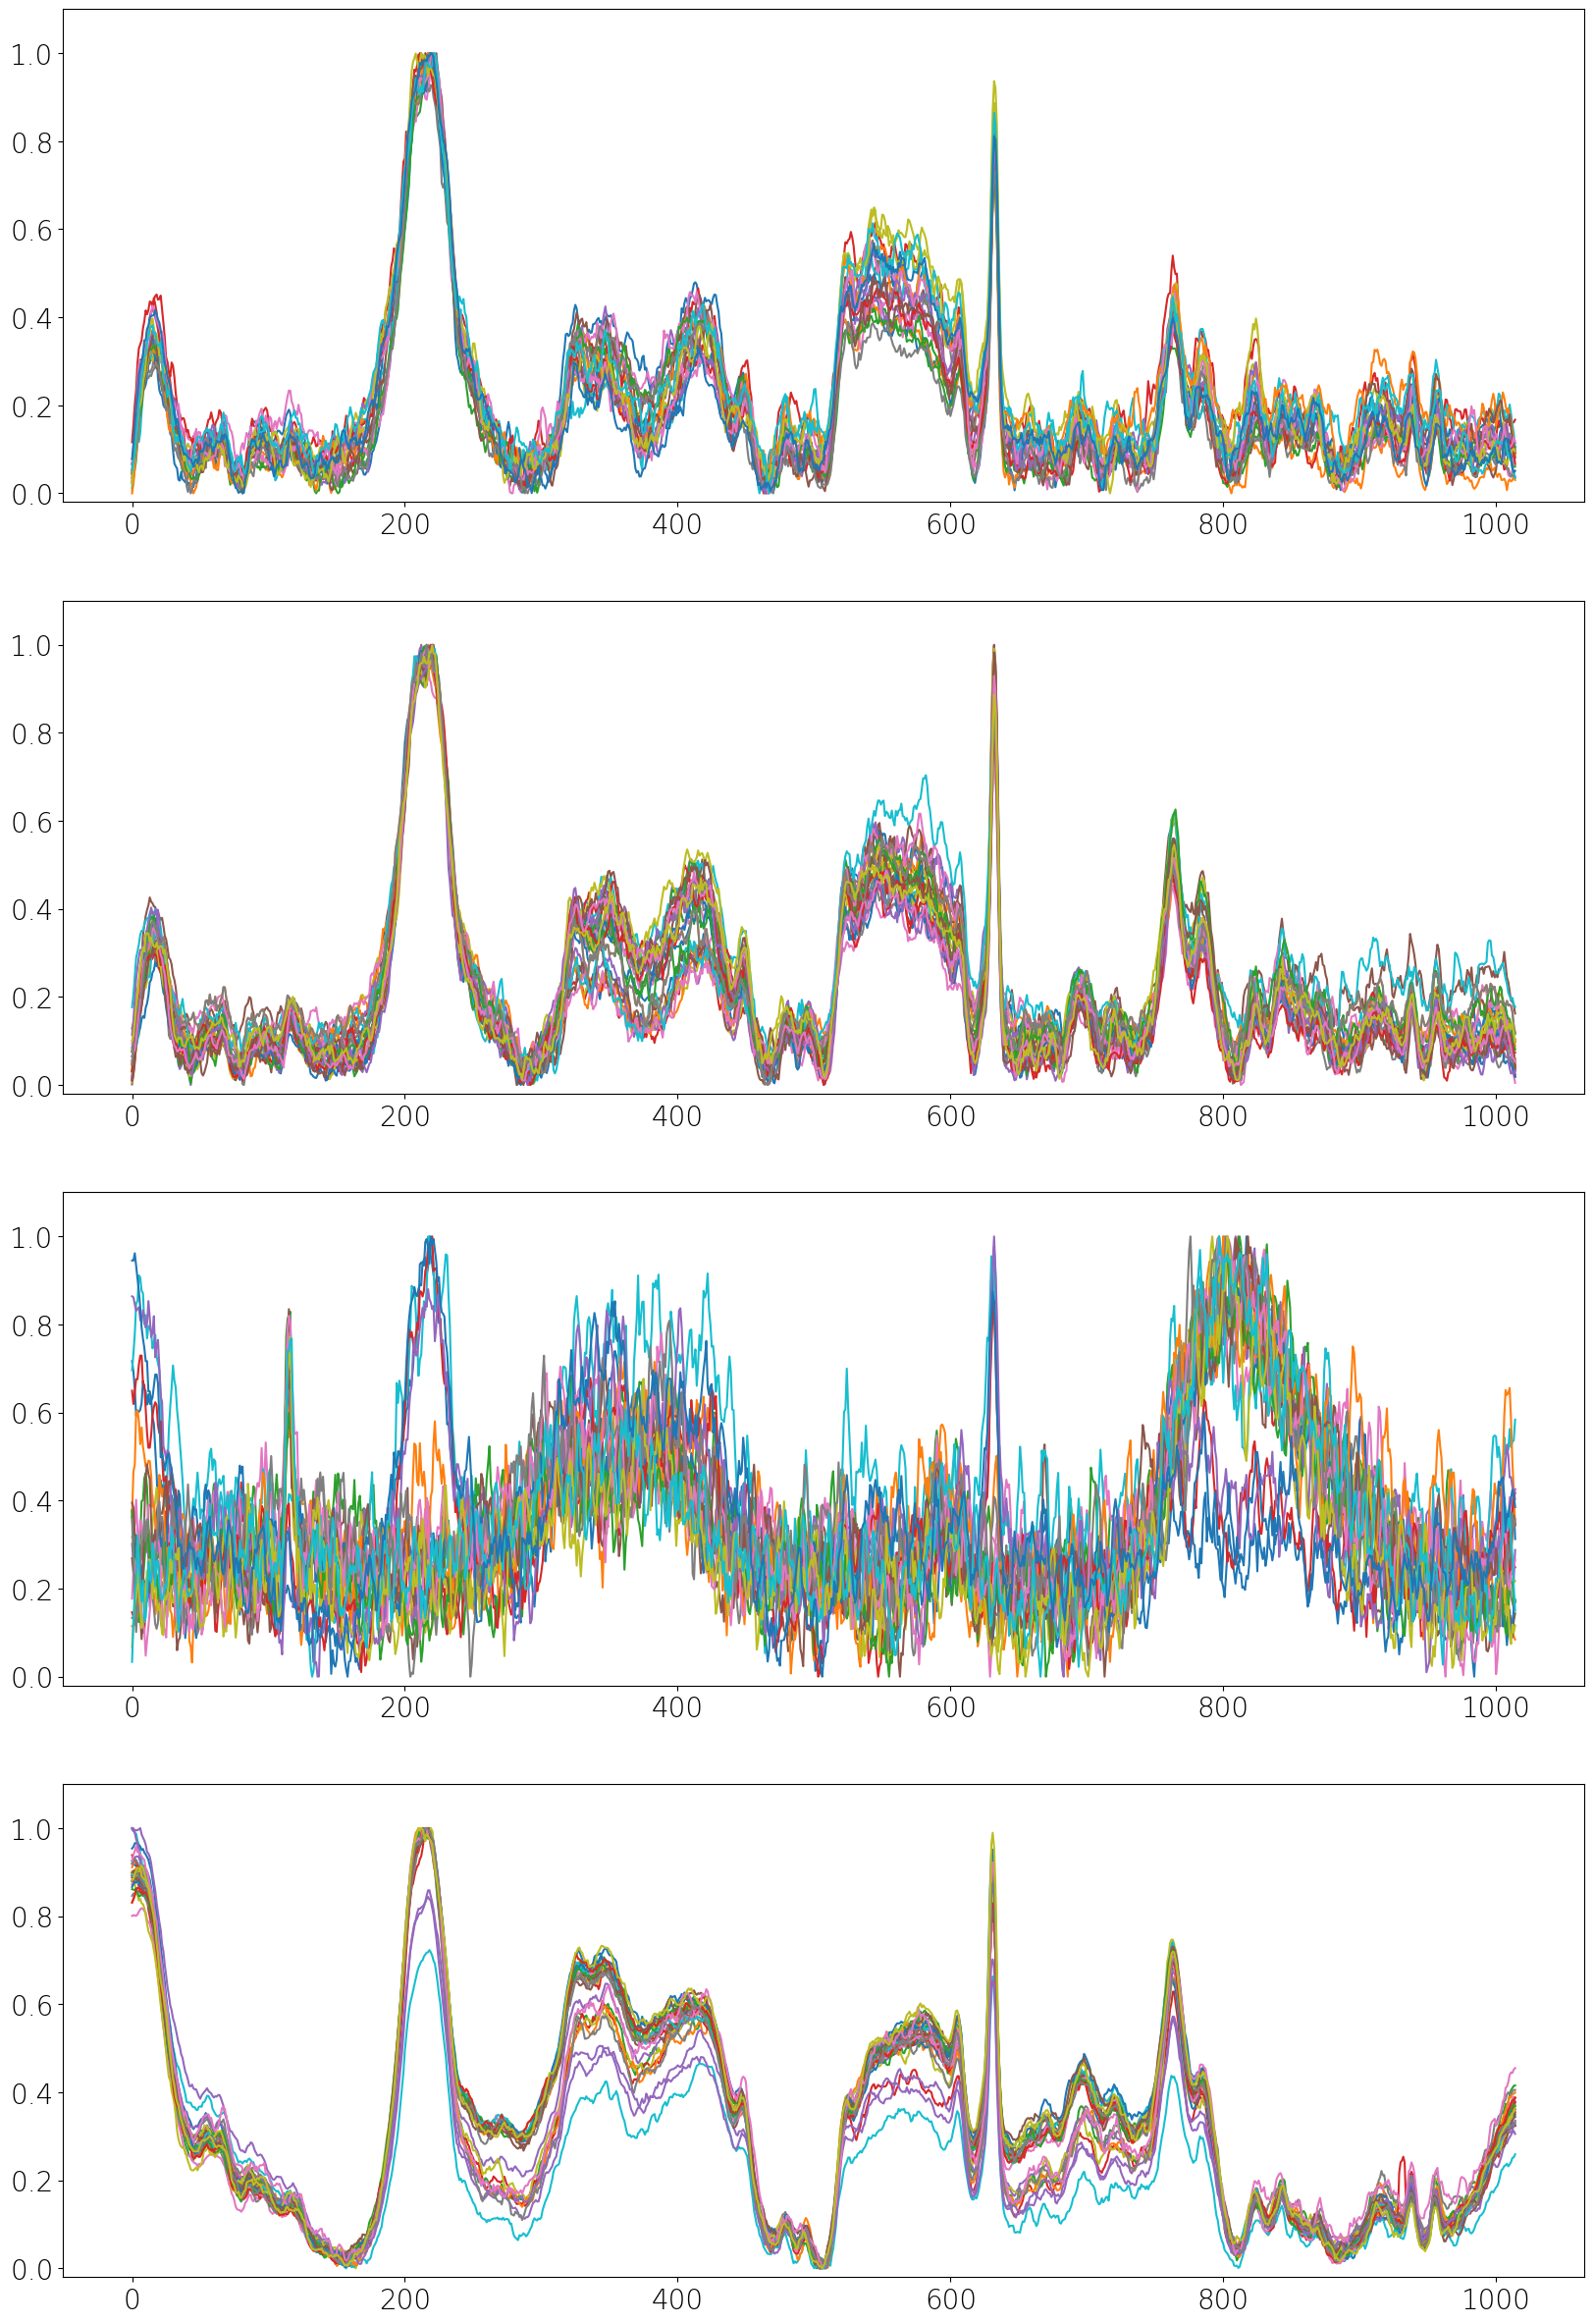

In [13]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(4,1,figsize=(20,30))
for i in range(100):
    axs[y_[i]].plot(X_[i])
    axs[y_[i]].set_ylim([-0.02,1.1])
plt.show()



In [14]:
mix6_test = []
ecoli = []
sa = []
mix6 = []
mix8 = []
all_ = [ecoli, sa, mix6 ,mix8]

for i in range(len(y_)):
    if y_[i] == 2:
        all_[predict_test[i]].append(X_[i])
        mix6_test.append(i)
print(mix6_test)


[2, 4, 10, 12, 15, 22, 30, 32, 42, 44, 45, 49, 58, 67, 69, 71, 73, 77, 81, 92, 99, 100, 104, 106, 120, 123, 126, 128, 129, 137, 142, 154, 155, 160, 165, 174, 175, 178, 181, 184, 187, 191, 194, 196, 200, 204, 206, 212, 224, 235, 241, 245, 252, 260, 272, 273, 274, 276, 282, 283, 289, 290, 292, 297, 302, 304, 309, 310, 314, 317, 319, 320, 323, 324, 327, 330, 332, 333, 334, 335, 336, 341, 355, 358, 360, 372, 374, 380, 381, 385, 389, 393, 394, 396, 398, 402, 404, 408, 410, 416, 423, 427, 431, 434, 437, 438, 439, 440, 444, 447, 448, 449, 451, 455, 459, 461, 464, 467, 472, 475, 476, 477, 479, 481, 483, 484, 487, 488, 489, 491, 500, 502, 503, 504, 505, 512, 517, 520, 525, 526, 530, 535, 538, 540, 542, 543, 547, 552, 555, 558, 562, 566, 569, 571, 574, 580, 585, 587, 588, 589, 592, 595, 598, 603, 605, 607, 608, 619, 620, 628, 632, 636, 637, 639, 645, 646, 650, 651, 658, 659, 661, 668, 669, 671, 673, 674, 682, 686, 690, 691, 694, 695, 696, 713, 715, 716, 723, 724, 731, 735, 742, 744, 748, 754, 75

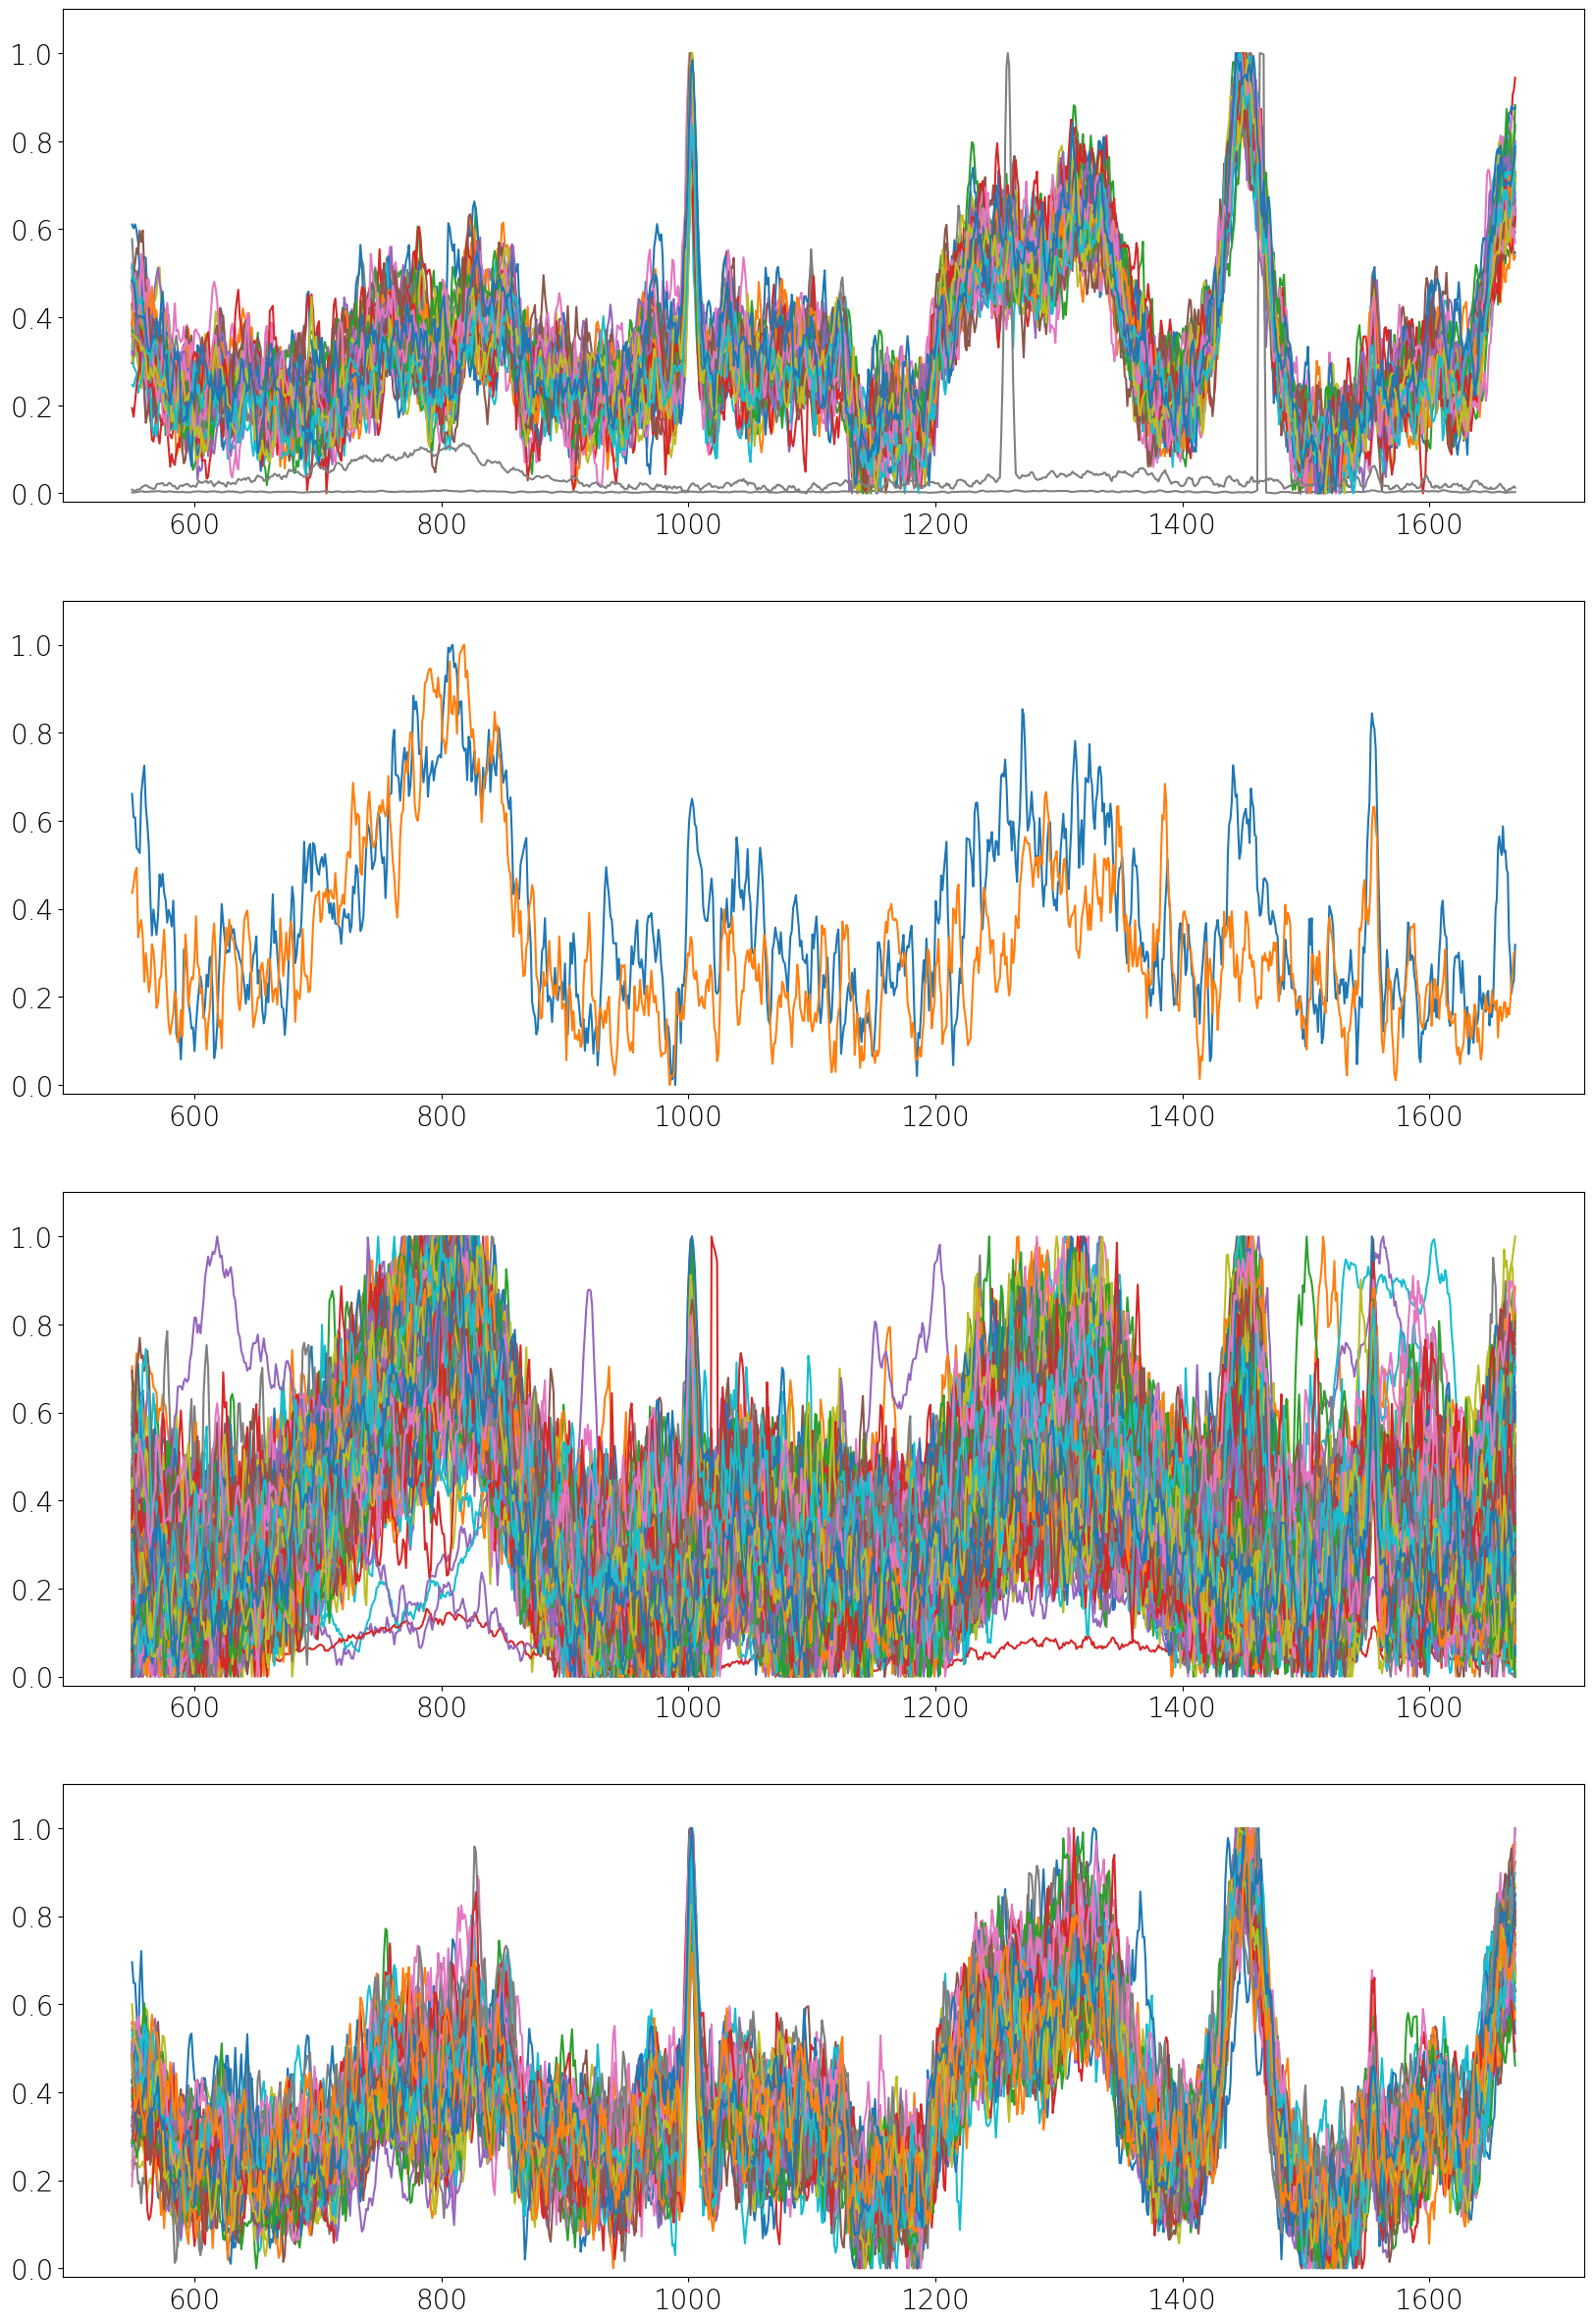

In [15]:
# label : mix6
# each prediction result 
 
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(4,1,figsize=(20,30))
for i in range(len(mix6_test)):
    axs[predict_test[mix6_test[i]]].plot(wavenum,X_[mix6_test[i]])
    axs[predict_test[mix6_test[i]]].set_ylim([-0.02,1.1])
plt.show()



In [16]:
len(all_[1])

2

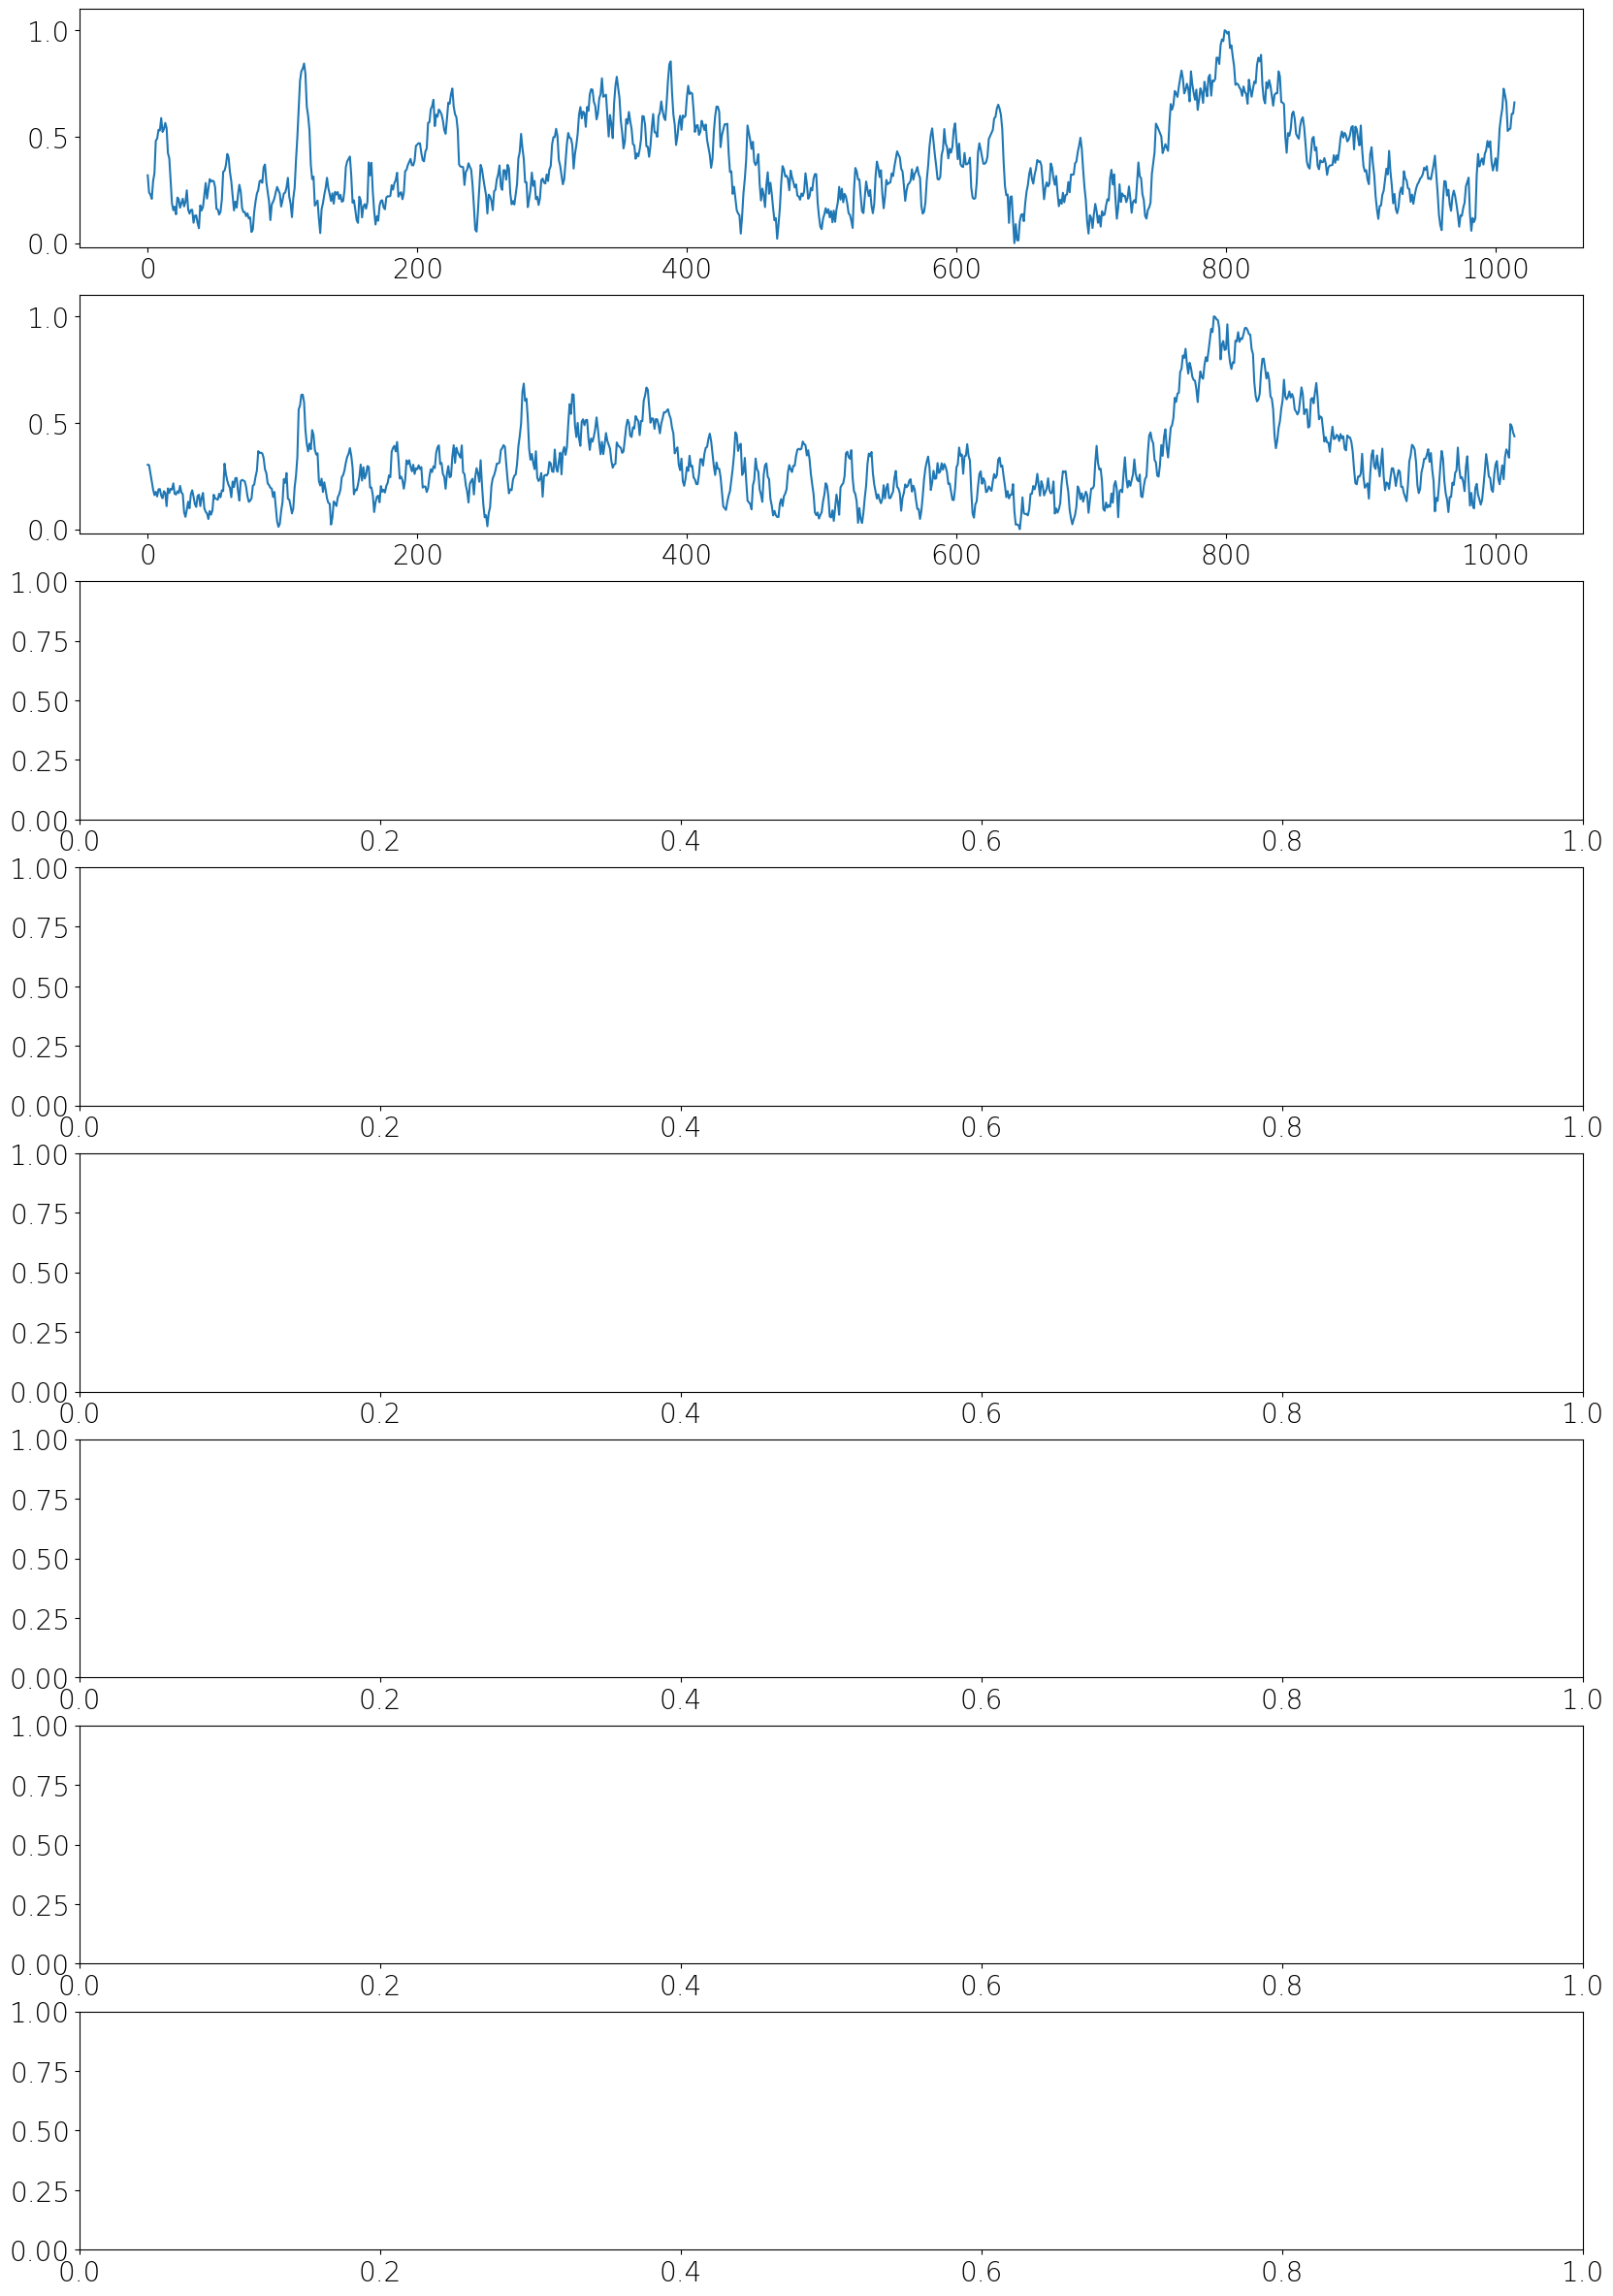

In [17]:
# label : mix6
# predict : S. aureus 

from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(8,1,figsize=(20,30))
for i in range(len(all_[1])):
    axs[i%8].plot(all_[1][i])
    axs[i%8].set_ylim([-0.02,1.1])
plt.show()



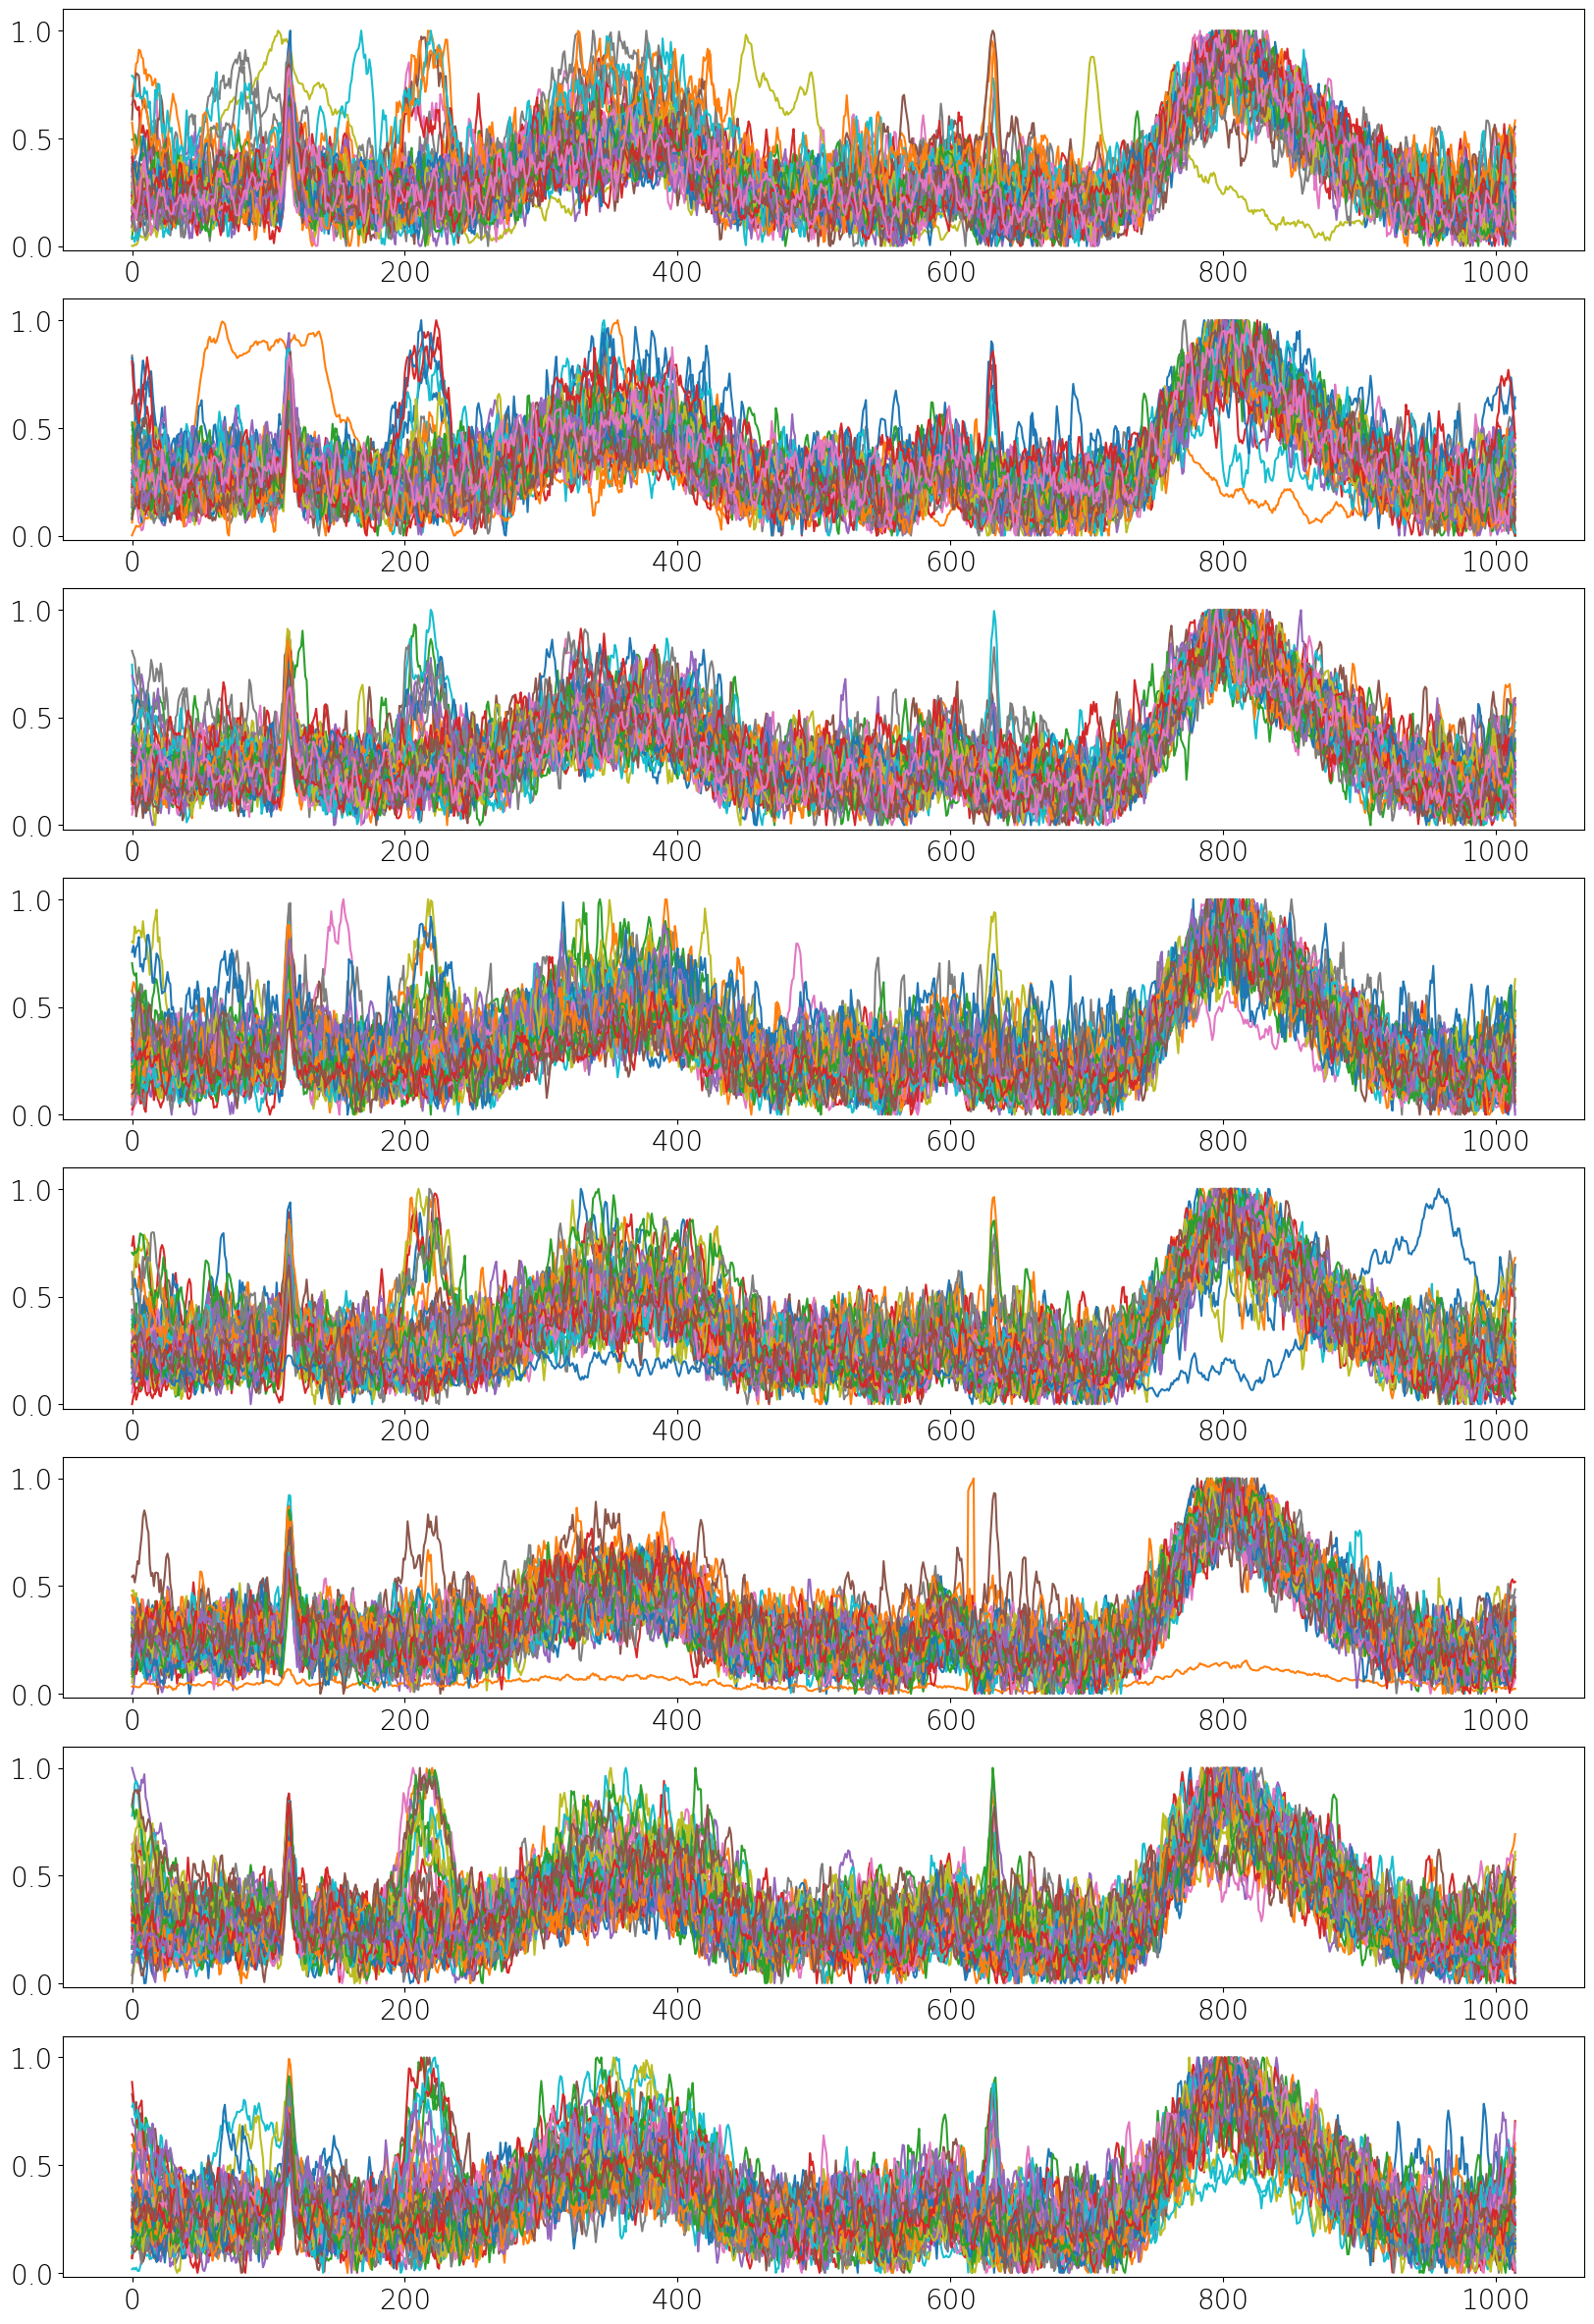

In [18]:
# label : mix6
# predict : mix6

from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(8,1,figsize=(20,30))
for i in range(len(all_[2])):
    axs[i%8].plot(all_[2][i])
    axs[i%8].set_ylim([-0.02,1.1])
plt.show()



In [28]:
print(len(X_test_seg))
print(X_test_seg[0].shape)

39
(436, 50)


In [30]:
print(y_test_argmax.shape)

(436,)


In [81]:
mdl.layers

In [91]:
dir(mdl.layers[-1])

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_compute_dtype_object',
 '_dedup_weights',
 '_default_training_arg',
 '_deferred_dependencies',
 '_d

In [92]:
mdl.layers[-1].output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'classification')>

In [96]:
for i in range(30):
    print(-i,mdl.layers[-i])
    #print(np.array(mdl.layers[-i].get_weights).shape)
    print(mdl.layers[-i].output,end='\n\n')

0 <keras.engine.input_layer.InputLayer object at 0x7fefcc280610>
KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")

-1 <keras.layers.core.dense.Dense object at 0x7fefbc30e610>
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='classification/Softmax:0', description="created by layer 'classification'")

-2 <keras.layers.core.lambda_layer.Lambda object at 0x7fefbc37b190>
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='embedding/l2_normalize:0', description="created by layer 'embedding'")

-3 <keras.layers.core.dropout.Dropout object at 0x7fefbc3788d0>
KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='dropout_2/Identity:0', description="created by layer 'dropout_2'")

-4 <keras.layers.advanced_activations.LeakyReLU object at 0x7fefbc300d10>
KerasTensor(type_spec=TensorSpec(shape=(None,

In [82]:
np.array(mdl.layers[-1].weights).shape

/home/jeonggyu/venv_dir/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(2,)

In [ ]:
def generate_grad_cam(input_spectrum, model, class_index, activation_layer):
    """
    params:
    -------
    input_spectrum : separated input raman spectrum
    model: pretrained ramannet model
    class_index: 정답 레이블
    activation_layer: 시각화하려는 레이어 이름

    return:
    grad_cam: grad_cam 히트맵
    """
    inp = model.input
    y_c = model.output.op.inputs[0][0, class_index]
    A_k = model.get_layer(activation_layer).output
    
    ## 이미지 텐서를 입력해서
    ## 해당 액티베이션 레이어의 아웃풋(a_k)과
    ## 소프트맥스 함수 인풋의 a_k에 대한 gradient를 구한다.
    get_output = K.function([inp], [A_k, K.gradients(y_c, A_k)[0], model.output])
    [conv_output, grad_val, model_output] = get_output([input_spectrum])

    ## 배치 사이즈가 1이므로 배치 차원을 없앤다.
    conv_output = conv_output[0]
    grad_val = grad_val[0]
    
    ## 구한 gradient를 픽셀 가로세로로 평균내서 a^c_k를 구한다.
    weights = np.mean(grad_val, axis=(0, 1))
    
    ## 추출한 conv_output에 weight를 곱하고 합하여 grad_cam을 얻는다.
    grad_cam = np.zeros(dtype=np.float32, shape=conv_output.shape[0:2])
    for k, w in enumerate(weights):
        grad_cam += w * conv_output[:, :, k]
    
    grad_cam = cv2.resize(grad_cam, (224, 224))

    ## ReLU를 씌워 음수를 0으로 만든다.
    grad_cam = np.maximum(grad_cam, 0)

    grad_cam = grad_cam / grad_cam.max()
    return grad_cam

In [19]:
for i in range(800):
    layer = mdl.get_layer(index=i)
    print(layer.name)

input_1
input_2
input_3
input_4
input_5
input_6
input_7
input_8
input_9
input_10
input_11
input_12
input_13
input_14
input_15
input_16
input_17
input_18
input_19
input_20
input_21
input_22
input_23
input_24
input_25
input_26
input_27
input_28
input_29
input_30
input_31
input_32
input_33
input_34
input_35
input_36
input_37
input_38
input_39
dense
dense_1
dense_2
dense_3
dense_4
dense_5
dense_6
dense_7
dense_8
dense_9
dense_10
dense_11
dense_12
dense_13
dense_14
dense_15
dense_16
dense_17
dense_18
dense_19
dense_20
dense_21
dense_22
dense_23
dense_24
dense_25
dense_26
dense_27
dense_28
dense_29
dense_30
dense_31
dense_32
dense_33
dense_34
dense_35
dense_36
dense_37
dense_38
batch_normalization
batch_normalization_1
batch_normalization_2
batch_normalization_3
batch_normalization_4
batch_normalization_5
batch_normalization_6
batch_normalization_7
batch_normalization_8
batch_normalization_9
batch_normalization_10
batch_normalization_11
batch_normalization_12
batch_normalization_13
batch_nor

ValueError: Was asked to retrieve layer at index 168 but model only has 168 layers.

In [ ]:
layer = mdl.get_layer(name='dense_'+str(447))
print(layer.name)
print(layer.weights)
print(dir([layer.weights]))

In [ ]:
weights = layer.get_weights()[0].T
biases = layer.get_weights()[1].T
print(weights[0])
print(biases[0])
print(weights[0]+biases[0])

In [ ]:
from matplotlib import pyplot as plt 
plt.rcParams["figure.figsize"]=15,5
plt.plot(X[0])

In [ ]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(25,39,figsize=(100,50))
for l in range(39):
    layer = mdl.get_layer(name='dense_'+str(447+l))
    print(layer.name)
    weights = layer.get_weights()[0].T
    biases = layer.get_weights()[1].T
    for i in range(25):
        axs[i,l].plot(weights[i]+biases[i])
        axs[i,l].set_ylim([-1,1])
plt.show()
plt.savefig('dense_layer.png')


In [ ]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(16,32,figsize=(100,100))

layer = mdl.get_layer(name='dense_'+str(164+i))
print(layer.name)
weights = layer.get_weights()[0].T
biases = layer.get_weights()[1].T
print(weights.shape)
for i in range(16):
    for j in range(32):
        axs[i,j].plot(weights[i*32+j]+biases[i*32+j])
        axs[i,j].set_ylim([-1,1])
plt.show()
plt.savefig('dense_layer2.png')


In [ ]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(16,16,figsize=(100,100))

layer = mdl.get_layer(name='dense_163')
print(layer.name)
weights = layer.get_weights()[0].T
biases = layer.get_weights()[1].T
print(weights.shape)
for i in range(16):
    for j in range(16):
        axs[i,j].plot(weights[i*16+j]+biases[i*16+j])
        axs[i,j].set_ylim([-1,1])
plt.show()
plt.savefig('dense_layer3.png')


In [ ]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(2,1,figsize=(100,100))

layer = mdl.get_layer(name='classification')
print(layer.name)
weights = layer.get_weights()[0].T
biases = layer.get_weights()[1].T
print(weights.shape)
for i in range(2):
    for j in range(1):
        axs[i].plot(weights[i*1+j]+biases[i*1+j])
        axs[i].set_ylim([-1,1])
plt.show()
plt.savefig('classification.png')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization, concatenate, Lambda, LeakyReLU
import numpy as np

In [ ]:
top =np.arange(0,256).reshape((1,256))/100
print(top.shape)

In [ ]:
emb = Lambda(lambda x: tf.math.l2_normalize(x, axis=1), name='embedding')(top)      # computed embedding
print(top)
print(emb)